- **Name : Hritik Vijay**

- **Roll No. : D21015**

- **TF Assignment**

## Time Series -  Cross Validation

- Dataset : Airpassengers.csv

**The simplest of the exponentially smoothing methods is naturally called simple exponential smoothing. This method is suitable for forecasting data with no clear trend or seasonal pattern.**

**The tsCV function is very general, and will work for any forecasting function that returns an object of class forecast. You don’t even have to specify the minimum sample size for model fitting, as it will silently fit models beginning with a single observation, and return a missing value whenever the model cannot be estimated.**

In [1]:
# Importing the necessary libraries
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt
from sklearn.model_selection import TimeSeriesSplit

In [2]:
# Changing directory and reading the file
os.chdir(r"/Users/hrit_vij/Downloads")
data = pd.read_csv("AirPassengers.csv",header=0, infer_datetime_format=True, parse_dates=[0], index_col=[0])
data.index.freq = 'MS'

In [27]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [29]:
data.shape

(144, 1)

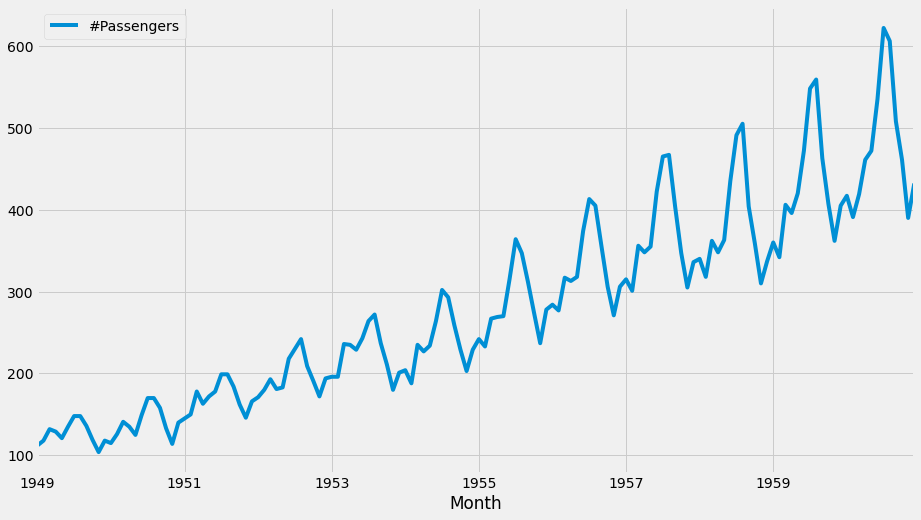

In [30]:
from matplotlib import pyplot
data.plot()
pyplot.show()


- **The total number of observations in the data is 144. Let us now perform the three fold cross-validation by splitting the data using TimeSeriesSplit. Then find out how many values are there in each fold. The number of observations in test set will be generally the same (36 in this case as shown in the below results), while the number of observations in training sets will differ (36, 72 and 108).** 

In [31]:
#Specifying fold and perform splitting
tscv = TimeSeriesSplit(n_splits=3)
tscv.split(data)

<generator object TimeSeriesSplit.split at 0x7f9261b99510>

- **Finding out no of observations in train and test sets**


In [32]:
i=0
for train, test in tscv.split(data):
    i=i+1
    print ("No of observations under train%s=%s" % (i, len(train)))
    print ("No of observations under test%s=%s" % (i, len(test)))

No of observations under train1=36
No of observations under test1=36
No of observations under train2=72
No of observations under test2=36
No of observations under train3=108
No of observations under test3=36


- **We can now split the data according to the above specs**


In [33]:
train1, test1 = data.iloc[:36, 0], data.iloc[36:72, 0]
train2, test2 = data.iloc[:72, 0], data.iloc[72:108, 0]
train3, test3 = data.iloc[:108, 0], data.iloc[108:144, 0]

### Fitting the Model and Cross Validating

In [34]:
# importing libraries
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt

In [38]:
#First fold RMSE
model1 = ExponentialSmoothing(train1, seasonal='mul', seasonal_periods=12).fit()
pred1 = model1.predict(start=test1.index[0], end=test1.index[-1])
RMSE1=round(sqrt(mean_squared_error(test1, pred1)),2)

#Second fold RMSE
model2 = ExponentialSmoothing(train2, seasonal='mul', seasonal_periods=12).fit()
pred2 = model2.predict(start=test2.index[0], end=test2.index[-1])
RMSE2=round(sqrt(mean_squared_error(test2, pred2)),2)

#Third fold RMSE
model3 = ExponentialSmoothing(train3, seasonal='mul', seasonal_periods=12).fit()
pred3 = model3.predict(start=test3.index[0], end=test3.index[-1])
RMSE3=round(sqrt(mean_squared_error(test3, pred3)),2)

print ("RMSE1:", RMSE1)
print ("RMSE2:", RMSE2)
print ("RMSE3:", RMSE3)

Overall_RMSE=round((RMSE1+RMSE2+RMSE3)/3,2)
print ("Overall RMSE:", Overall_RMSE) 

RMSE1: 44.5
RMSE2: 84.74
RMSE3: 69.86
Overall RMSE: 66.37


- **We can now see the entire plot and observe the trends**

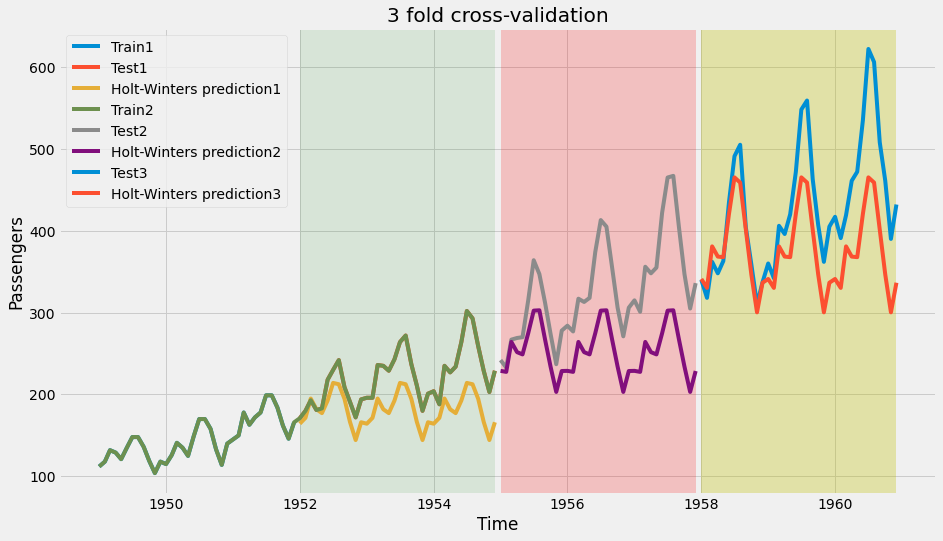

In [39]:
%matplotlib inline
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 14,8

#Labels and titles
plt.xlabel("Time")
plt.ylabel("Passengers")
plt.title("3 fold cross-validation")

#First fold- CV
plt.plot(train1.index, train1, label='Train1')
plt.plot(test1.index, test1, label='Test1')
plt.plot(pred1.index, pred1, label='Holt-Winters prediction1')
plt.legend(loc='best')
#Highlighting the region
plt.axvspan(test1.index[0], test1.index[-1],  facecolor='g', alpha=0.1)

#Second fold
plt.plot(train2.index, train2, label='Train2')
plt.plot(test2.index, test2, label='Test2')
plt.plot(pred2.index, pred2, label='Holt-Winters prediction2')
plt.legend(loc='best')
#Highlighting the region
plt.axvspan(test2.index[0], test2.index[-1],  facecolor='r', alpha=0.2)

#Third fold
plt.plot(test3.index, test3, label='Test3')
plt.plot(pred3.index, pred3, label='Holt-Winters prediction3')
plt.legend(loc='best')
#Highlighting the region
plt.axvspan(test3.index[0], test3.index[-1],  facecolor='y', alpha=0.3)

                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -689.067
Date:                Wed, 26 Jan 2022   AIC                           1390.135
Time:                        16:45:14   BIC                           1407.912
Sample:                    01-01-1949   HQIC                          1397.358
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3223      0.097      3.334      0.001       0.133       0.512
ar.L2         -0.2170      0.078     -2.776      0.006      -0.370      -0.064
ar.L3         -0.0646      0.071     -0.915      0.3

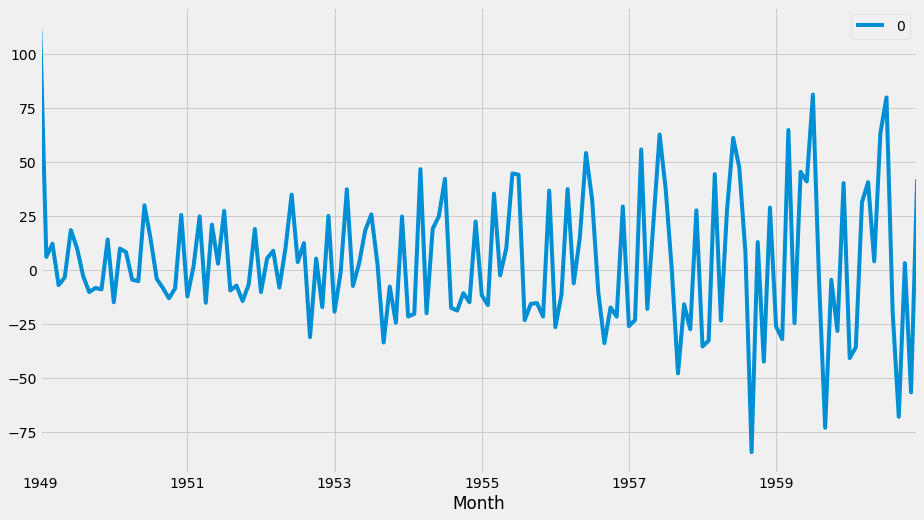

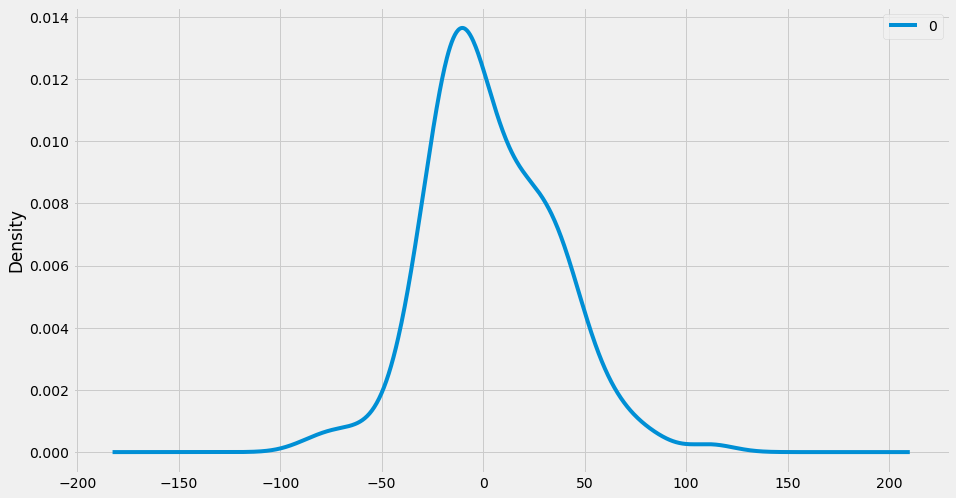

                0
count  144.000000
mean     3.893151
std     31.087159
min    -84.397612
25%    -16.548937
50%     -1.792613
75%     25.066151
max    112.000000


In [43]:
from statsmodels.tsa.arima.model import ARIMA
# fit model
model = ARIMA(data, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

- **We can notice the genuine and estimated qualities for the approval dataset. These qualities are likewise plotted on a line plot which shows a promising aftereffect of our model.**

*The End*